<a href="https://colab.research.google.com/github/Tasfia48/Predictive_Policing/blob/master/Stop_and_Crime_Data_beatwise_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###List of Police beats in chicago city

In [203]:
df_beat = pd.read_csv('/content/drive/My Drive/CPD/Crime data/PoliceBeatDec2012.csv')
df_beat.head()

,the_geom,DISTRICT,SECTOR,BEAT,BEAT_NUM
0,MULTIPOLYGON (((-87.7047252651434 41.975774430...,17,1,1,1713
1,MULTIPOLYGON (((-87.83365455041093 41.97535481...,31,0,0,3100
2,MULTIPOLYGON (((-87.90684167275818 41.97656175...,16,5,5,1651
3,MULTIPOLYGON (((-87.64491798475646 41.96972709...,19,1,1,1914
4,MULTIPOLYGON (((-87.63724132684592 41.96598776...,19,1,1,1915


###Load Stop Data year 2016

In [204]:
df_16 = pd.read_csv('/content/drive/My Drive/CPD/Stop Data/Stopdata(2016).csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (12,72,100,102,110,111,117,119,128,132,168) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [205]:
df_16 = df_16.groupby(['BEAT']).count().reset_index()
df_16 = df_16.rename(columns={'CARD_NO' :'count'})
df_16 = df_16[['BEAT','count']]


###Number of total stop in 2016 (ranked in decending order)

In [206]:
df_16.sort_values(by='count',ascending=False)

,BEAT,count
116,1011.0,1842
132,1115.0,1658
139,1132.0,1447
173,1522.0,1418
178,1533.0,1308
...,...,...
10,133.0,39
25,235.0,35
207,1813.0,33
194,1654.0,28


### Load Stop data, year 2017-2019

In [207]:
df = pd.read_csv('/content/drive/My Drive/CPD/Stop Data/StopData(2017-2019).csv')

In [208]:
df['CONTACT_DATE']=pd.to_datetime(df['CONTACT_DATE'])
df= df[['CONTACT_DATE','SECTOR','BEAT','DISTRICT','Year',	'Month']]
df['Date'] = df['CONTACT_DATE'].dt.date
df['Date']=pd.to_datetime(df['Date'])
df.head()

,CONTACT_DATE,SECTOR,BEAT,DISTRICT,Year,Month,Date
0,2017-01-01 00:15:00,202,2024,20,2017,1,2017-01-01
1,2017-01-01 00:45:00,192,1924,19,2017,1,2017-01-01
2,2017-01-01 01:03:00,22,225,2,2017,1,2017-01-01
3,2017-01-01 01:06:00,222,2223,22,2017,1,2017-01-01
4,2017-01-01 01:17:00,101,1012,10,2017,1,2017-01-01


In [35]:
#df_one = df.groupby(['Date','BEAT']).count().reset_index()


###Creating timeseries of Stop Data for Each beat 


In [209]:
def groupList(df,B_no):
  df_one = df[df['BEAT'] == B_no]
  df_one = df_one.groupby(['Year','Month']).count().reset_index()
  #df_one = df_one.groupby(['Date']).count().reset_index()
  df_one = df_one.rename(columns={'BEAT' :'count'})
  temp= df_one['count'].values
  return temp

In [210]:
stop_timeseries = dict()
for x in df["BEAT"].unique():
  stop_timeseries[x]=groupList(df,x)

### Load Crime Data

In [211]:
df_crime = pd.read_csv('/content/drive/My Drive/CPD/Crime data/Crimes_-_2017_to_present.csv')

In [212]:
### clean crime data
df_crime['Date'] = pd.to_datetime(df_crime['Date'])
crime_data = df_crime[df_crime['Year'] < 2020]
crime_data['Month'] = crime_data['Date'].dt.month 
crime_data['BEAT'] = crime_data['Beat']
crime_data = crime_data.join(df_beat.set_index('BEAT'), on='BEAT')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


###Creating timeseries of Crime Data for Each beat 


In [213]:
crime_timeseries = dict()
for x in crime_data["BEAT"].unique():
  crime_timeseries[x]=groupList(crime_data,x)

###Comparing Crime(orange) and Stop(blue) Data for each beat

In [214]:
    ### compare crime and stop count for beat 1914
    def plotTimeSeries(beat):
      plt.figure(figsize=(20,8))
      plt.plot(stop_timeseries[beat],label="Stop Series")
      plt.plot(crime_timeseries[beat],label="Crime Series")
      plt.legend(loc="upper left")
      plt.xlabel("time (month,year)", fontsize=18)
      plt.ylabel('count', fontsize=16)
      plt.show()

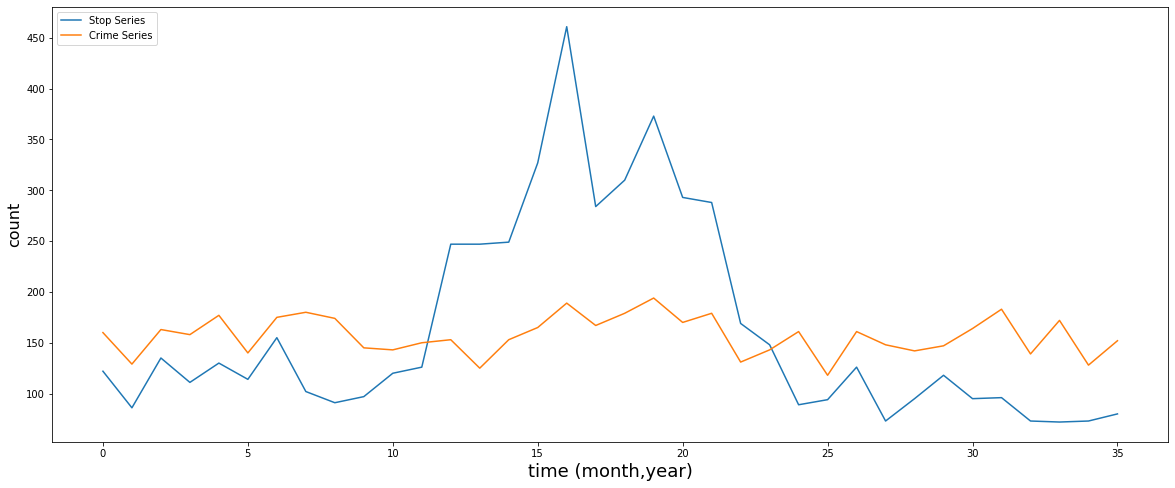

In [215]:
   plotTimeSeries(1011)

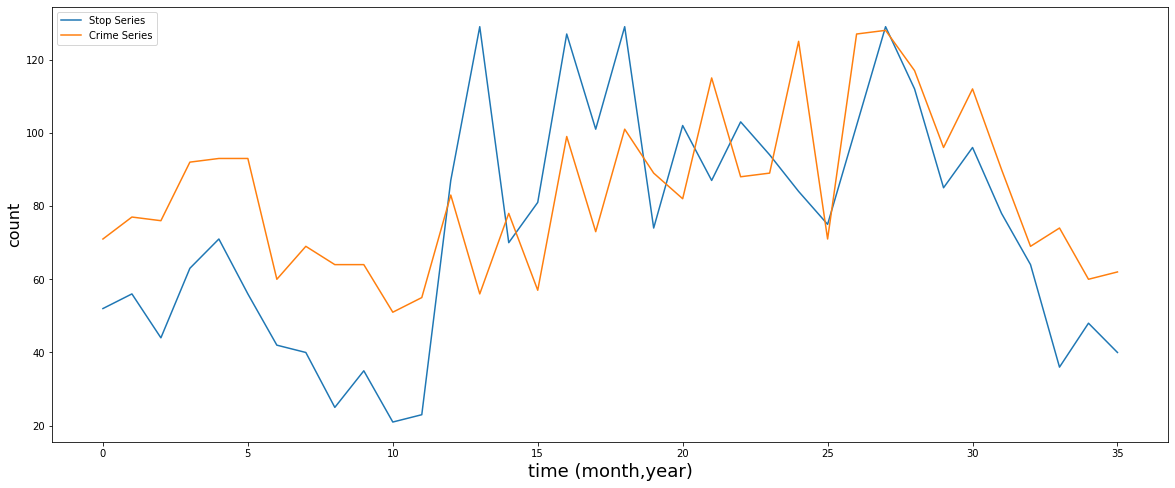

In [216]:
   plotTimeSeries(1115)

In [217]:
rng = pd.date_range('2017-01-01', periods=1095, freq='D')
df_day = pd.DataFrame({ 'Date': rng}) 
df_day['Date']=pd.to_datetime(df_day['Date'])

In [218]:
df_Top1 = df[df['BEAT'] == 1011]
df_Top2 = df[df['BEAT'] == 1115]
df_Top1=df_Top1.groupby(['Date']).count().reset_index()
df_Top2=df_Top2.groupby(['Date']).count().reset_index()
df_Top1 = df_Top1.rename(columns={'BEAT' :'count'})
df_Top2 = df_Top2.rename(columns={'BEAT' :'count'})
df_Top1=df_Top1[['Date','count']]
df_Top2=df_Top2[['Date','count']]
df_Top1 = df_day.join(df_Top1.set_index('Date'), on='Date')
df_Top1['count'] = df_Top1['count'].replace(np.nan, 0)
df_Top2 = df_day.join(df_Top2.set_index('Date'), on='Date')
df_Top2['count'] = df_Top2['count'].replace(np.nan, 0)
df_Top1['top2 count'] = df_Top2['count']

In [219]:
s = 0
ts = 0
rt = []
w = 15
for ind in range(0,len(df_Top1)):
  row = df_Top1.iloc[ind]
  count = row['count']
  count1 = row['top2 count']
  if ind < 10 :
    s += count
    ts += count+count1
    rt.append(0)

  else:
    outOfWind = df_Top1.iloc[ind-w]
    s = s - outOfWind['count']+ count
    ts = ts - outOfWind['count'] - outOfWind['top2 count'] + count + count1
    rt.append(s/ts)
    
df_Top1['ratio'] = rt

In [220]:
df_Top1['ratio'] = df_Top1['ratio'].replace(np.nan, 0)
r = df_Top1["ratio"].values

### Determining Crime rate for Top two Police Beats with highest number of stops in year 2016


In [221]:
df_rate = pd.read_csv('/content/drive/My Drive/CPD/Crime data/CrimeData(2012-2016).csv')


In [222]:
df_rate = df_rate[['Date','Beat',	'District',	'Ward','only_date']]
df_rate = df_rate.groupby('Beat').count().reset_index()

In [223]:
df_rate1 = df_rate[(df_rate.Beat == 1011) ]
df_rate2 = df_rate[(df_rate.Beat == 1115) ]
lambdaA= df_rate1.iloc[0]['Ward']/1462
lambdaB= df_rate2.iloc[0]['Ward']/1462

### Polya Urn

.

Setting urn to be Poisson
Setting exponential decay to 0.010000


..........

counts.shape[1] 1095
counts.shape[1] 1095
[1. 0.]
[[6.5, 0], [0, 4.580711354309165]]


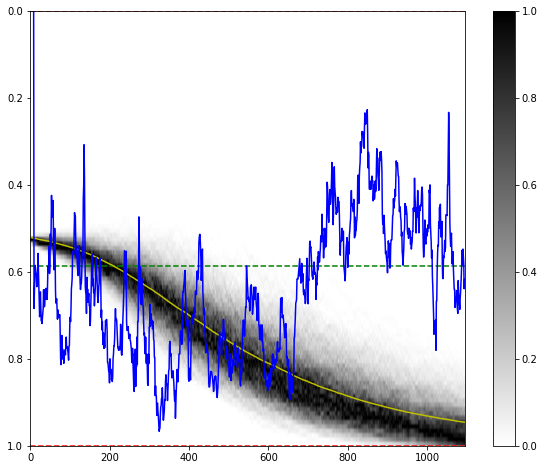

In [224]:
#classical polya urn
urn_class = PolyaUrn
set_abcd(lambdaA,0,0,lambdaB)
poisson = numpy.random.poisson
poisson_option(poisson)
exponential_decay_option(0.01)
urn = urn_class((1842, 1658), urn_params)
t = probplot(urn,1095,1095,lambdaA,lambdaB,r)

print(urn_params)

.

Setting urn to be Poisson
Setting exponential decay to 0.010000
Setting urn to behave with linear surprise


..........

counts.shape[1] 1095
counts.shape[1] 1095
[1. 0.]
[[6.5, 0], [0, 4.580711354309165]]


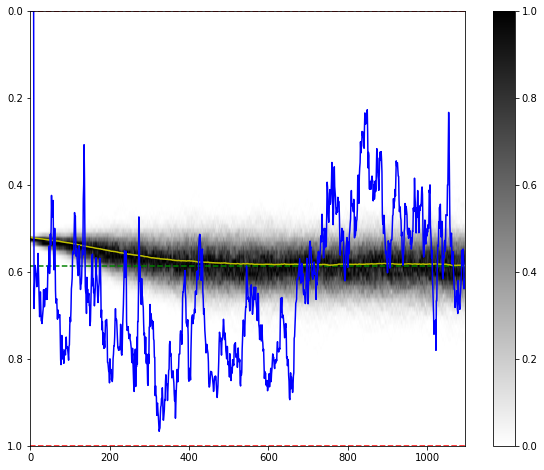

In [225]:
##Modified urn model
urn_class = PolyaUrn
set_abcd(lambdaA,0,0,lambdaB)
poisson = numpy.random.poisson
poisson_option(poisson)
exponential_decay_option(0.01)
linear_surprise_option('linear_surprise')
urn = urn_class((1842, 1658), urn_params)
t= probplot(urn,1095,1095,lambdaA,lambdaB,r)
print(urn_params)

In [149]:
#Replacement matrix for urn parameters
def set_abcd(a,b,c,d):
  urn_params[0][0] = a
  urn_params[0][1] = b
  urn_params[1][0] = c
  urn_params[1][1] = d

In [147]:
import numpy.random
import random

##############################################################################

class PolyaUrn:
    """A basic Polya Urn with a given update matrix"""

    def __init__(self, initial_state, update_matrix):
        self.initial_state = initial_state
        self.update_matrix = update_matrix
        self.reset()

    def reset(self):
        self.state = self.initial_state

    def after_draw(self, choice, state):
        return state

    def update_row(self, choice, state):
        return self.update_matrix[choice]

    def draw(self, draws=1):
        rr = random.random
        binom = numpy.random.binomial
        ss = self.state
        ad = self.after_draw
        ur = self.update_row
        choices = { False: 1, True: 0 }
        for i in range(draws):
            #print("ss",ss)
            v = rr() * (ss[0] + ss[1])
            choice = choices[v<ss[0]]
            update_row = ur(choice, ss)
            ss = (ss[0] + update_row[0], ss[1] + update_row[1])
            ss = ad(choice, ss)
            yield ss
        self.state = ss

##############################################################################

def add_truncation(cls, truncation):
    class TruncatedUrn(cls):
        def __init__(self, *args, **kwargs):
            cls.__init__(self, *args, **kwargs)
        def update_row(self, choice, state):
            ur = cls.update_row(self, choice, state)
            return (min(ur[0], truncation),
                    min(ur[1], truncation))
    return TruncatedUrn

def add_poisson_update(cls):
    poisson = numpy.random.poisson
    class PoissonUrn(cls):
        def __init__(self, *args, **kwargs):
            cls.__init__(self, *args, **kwargs)
        def update_row(self, choice, state):
            ur = cls.update_row(self, choice, state)
            return poisson(ur)
    return PoissonUrn

def add_exponential_decay(cls, prob):
    binom = numpy.random.binomial
    ad = cls.after_draw
    class ExponentiallyDecayingUrn(cls):
        def __init__(self, *args, **kwargs):
            cls.__init__(self, *args, **kwargs)
        def after_draw(self, choice, state):
            state = ad(self, choice, state)
            decay = binom(state, prob)
            state = (max(state[0] - decay[0], 1),
                     max(state[1] - decay[1], 1))
            return state
    return ExponentiallyDecayingUrn

def add_linear_surprise(cls):
    rr = random.random
    class GoodPolyaUrn(cls):
        def __init__(self, *args, **kwargs):
            cls.__init__(self, *args, **kwargs)
        def update_row(self, choice, ss):
            r = rr()
            t = sum(ss)
            v = ((t - ss[0]) / t,
                 (t - ss[1]) / t)
            mx = max(v[0], v[1])
            v = (v[0] / mx, v[1] / mx)
            if r >= v[choice]:
                return (0,0)
            return cls.update_row(self, choice, ss)
    return GoodPolyaUrn

In [148]:
import math
import pylab
import sys
import click

#temp=[]

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

# def histogram(urn, ndraws, nruns, lambdaa, lambdab):
#     x = []
#     for i in range(nruns):
#         urn.reset()
#         for _ in urn.draw(ndraws): pass
#         x.append(urn.state[0] / (urn.state[0] + urn.state[1]))
#         if i % 100 == 0:
#             print(".", file=sys.stderr, end='')
#             sys.stderr.flush()
#     print("", file=sys.stderr)
#     pylab.hist(x)

# def singlerun(urn, ndraws, nrunsm, lambdaa, lambdab):
#     x = []
#     y = []
#     for state in urn.draw(ndraws):
#         x.append(state[0])
#         y.append(state[1])
#     pylab.plot(x, 'r')
#     pylab.plot(y, 'k')
#     pylab.plot(list(a + b for a,b in zip(x,y)), 'b--')

# def singleprob(urn, ndraws, nrunsm, lambdaa, lambdab):
#     x = []
#     y = []
#     s = 0
#     c = 0
#     for state in urn.draw(ndraws):
#         x.append(state[0])
#         y.append(state[1])
#         s += (x[-1] / (x[-1]+y[-1]))
#         c += 1
#     pylab.plot(list((a / (a + b)) for (a,b) in zip(x, y)), 'r')
#     print(s/c)
#     print(urn.state)

def probplot(urn, ndraws, nruns, lambdaa, lambdab,stop_data):
    plt.figure(figsize=(10,8))
    burn_in = 0
    histo_resolution = 100
    counts = numpy.zeros((histo_resolution+1, ndraws-burn_in))
    for i in range(nruns):
        urn.reset()
        for _ in urn.draw(burn_in): pass
        for j, state in enumerate(urn.draw(ndraws-burn_in)):
            u = state[0] / (state[0] + state[1])
            counts[100-int(u*histo_resolution), j] += 1
        if i % 100 == 0:
            #print("state", state)
            print(".", file=sys.stderr, end='')
            sys.stderr.flush()
    v = (counts * numpy.linspace(1, 0, 101)[:,numpy.newaxis]).sum(axis=0) / counts.sum(axis=0)
    counts_max = counts.max(axis=0)
    counts = counts / counts_max
    pylab.imshow(counts, extent=[0, counts.shape[1],
                                 0, 1.01],
                 aspect=ndraws, cmap=pylab.cm.gray_r)
    ((a, b), (c, d)) = urn.update_matrix
    result = numpy.roots([c+d-a-b, a - 2 * c - d, c])
    #print("result=",result)
    for r in result:
        if r >= 0 and r <= 1:
            print("counts.shape[1]",counts.shape[1])
            pylab.plot([0, counts.shape[1]], [r, r], 'r--')
#    pylab.plot([0, counts.shape[1]], [(a + b) / (a + b + c + d),
#                                      (a + b) / (a + b + c + d)], 'g--')
    pylab.plot([0, counts.shape[1]], [ lambdaa / (lambdab + lambdaa), lambdaa / (lambdab + lambdaa)], 'g--')
    pylab.plot(numpy.arange(counts.shape[1]), v, 'y-')
    if len(stop_data):
      pylab.plot(numpy.arange(stop_data.shape[0]), stop_data, 'b-')
    pylab.xlim([0, counts.shape[1]])
    pylab.ylim([1, 0])
    print(result)
    pylab.colorbar()
        
commands = {
    "singlerun": singlerun,
    "histogram": histogram,
    "probplot": probplot,
    "singleprob": singleprob
    }



def exponential_decay_option(exponential_decay):
    global urn_class
    if exponential_decay == 0.0:
        return
    print("Setting exponential decay to %f" % exponential_decay)
    urn_class = add_exponential_decay(urn_class, exponential_decay)

def linear_surprise_option(linear_surprise):
    global urn_class
    if not linear_surprise:
        return
    print("Setting urn to behave with linear surprise")
    urn_class = add_linear_surprise(urn_class)

def partial_surprise_option(partial_surprise):
    global urn_class
    if partial_surprise == (None, None):
        return
    print("Setting urn to behave with partial surprise")
    urn_class = add_partial_surprise(urn_class, partial_surprise)

def weighted_surprise_option(param, weighted_surprise):
    global urn_class
    if weighted_surprise == (None, None, None, None):
        return
    print("Setting urn to behave with weighted surprise")
    urn_class = add_weighted_surprise(urn_class, weighted_surprise)

def sqrt_surprise_option(param, sqrt_surprise):
    global urn_class
    if not sqrt_surprise:
        return
    print("Setting urn to behave with sqrt surprise")
    urn_class = add_sqrt_surprise(urn_class)

def poisson_option(poisson):
    global urn_class
    if not poisson:
        return
    print("Setting urn to be Poisson")
    urn_class = add_poisson_update(urn_class)

def truncation_option(param, truncation):
    global urn_class
    if truncation is None:
        return
    print("Truncating urn update to %d" % truncation)
    urn_class = add_truncation(urn_class, truncation)

urn_params = [[1.0,0.0],[0.0,1.0]]

def mixed_option( param, mixed):
    if mixed == (None, None, None, None):
        return
    (d_a, d_b, r_a, r_b) = mixed
    urn_params[0][0] = d_a + r_a
    urn_params[0][1] = r_b
    urn_params[1][0] = r_a
    urn_params[1][1] = d_b + r_b
